In [14]:
import os
import pandas as pd
import numpy as np

In [15]:

def remove_duplicates_excel(directory):
  for filename in os.listdir(directory):
    if filename.endswith(".csv") or filename.endswith(".xlsx") or filename.endswith(".xls") :  # Check for both xlsx and xls extensions
      filepath = os.path.join(directory, filename)
      try:
        # Read the Excel file
        df = pd.read_csv(filepath,engine='c')

        # Remove duplicate rows (excluding the first occurrence)
        df = df.drop_duplicates(keep='first')  # Keep the first occurrence of duplicates

        # Save the deduplicated data to a new file (optional)
        # new_filename = os.path.splitext(filename)[0] + "_deduplicated.xlsx"
        # df.to_excel(os.path.join(directory, new_filename), index=False)

        # Save the deduplicated data back to the original file (uncomment for in-place update)
        df.to_csv(filepath, index=False)
        print(f"Duplicates removed from: {filename}")
      except FileNotFoundError:
        print(f"File not found: {filename}")
      except pd.errors.ParserError:
        print(f"Error parsing Excel file: {filename}")

# Example usage
directory_path = "D:\Quoc Thang\DATA ANALYST PROJECT\sql and python"  # Replace with the actual directory path
remove_duplicates_excel(directory_path)

Duplicates removed from: olist_customers_dataset.csv
Duplicates removed from: olist_geolocation_dataset.csv
Duplicates removed from: olist_orders_dataset.csv
Duplicates removed from: olist_order_items_dataset.csv
Duplicates removed from: olist_order_payments_dataset.csv
Duplicates removed from: olist_order_reviews_dataset.csv
Duplicates removed from: olist_products_dataset.csv
Duplicates removed from: olist_sellers_dataset.csv
Duplicates removed from: product_category_name_translation.csv


In [16]:
arr = os.listdir('D:\Quoc Thang\DATA ANALYST PROJECT\sql and python')

In [17]:
def read_dataframes(file_list):
    data_frames = {}
    directory_path = "D:\Quoc Thang\DATA ANALYST PROJECT\sql and python"  
    for filename in file_list:
            data_frame_name = filename.split('.')[0]
            data_frames[data_frame_name] = pd.read_csv(os.path.join(directory_path, filename))
    return data_frames

# Example usage
listFile = ['olist_customers_dataset.csv', 'olist_geolocation_dataset.csv', 
            'olist_orders_dataset.csv', 'olist_order_items_dataset.csv', 
            'olist_order_payments_dataset.csv', 'olist_order_reviews_dataset.csv', 
            'olist_products_dataset.csv', 'olist_sellers_dataset.csv']

data_by_file = read_dataframes(listFile)

In [28]:
data_by_file['olist_orders_dataset'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [5]:
data_by_file['olist_orders_dataset']['order_purchase_timestamp'] = pd.to_datetime(data_by_file['olist_orders_dataset']['order_purchase_timestamp'],format='%d/%m/%Y')

ValueError: time data "2017-10-02 10:56:33" doesn't match format "%d/%m/%Y", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [8]:
import datetime as dt
from datetime import datetime

In [31]:
data_by_file['olist_orders_dataset'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 6.1+ MB


In [29]:
data_by_file['olist_orders_dataset']['order_purchase_timestamp']=pd.to_datetime(data_by_file['olist_orders_dataset']['order_purchase_timestamp'], errors='coerce')

In [32]:
data_by_file['olist_orders_dataset']['order_purchase_timestamp'].dt.date

0        2017-10-02
1        2018-07-24
2        2018-08-08
3        2017-11-18
4        2018-02-13
            ...    
99436    2017-03-09
99437    2018-02-06
99438    2017-08-27
99439    2018-01-08
99440    2018-03-08
Name: order_purchase_timestamp, Length: 99441, dtype: object

In [33]:
count_by_date = data_by_file['olist_orders_dataset'].groupby([data_by_file['olist_orders_dataset']['order_purchase_timestamp'].dt.date]).count()

In [34]:
count_by_date

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_purchase_timestamp,,,,,,,,
2016-09-04,1,1,1,1,1,1,0,1
2016-09-05,1,1,1,1,1,0,0,1
2016-09-13,1,1,1,1,1,0,0,1
2016-09-15,1,1,1,1,1,1,1,1
2016-10-02,1,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...
2018-09-29,1,1,1,1,0,0,0,1
2018-10-01,1,1,1,1,0,0,0,1
2018-10-03,1,1,1,1,0,0,0,1


In [35]:
order_df =  data_by_file['olist_orders_dataset']

In [36]:
order_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [37]:
order_df['order_purchase_timestamp'].dt.date.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99436     True
99437     True
99438     True
99439     True
99440     True
Name: order_purchase_timestamp, Length: 99441, dtype: bool

In [38]:
order_df.sort_values(by=['order_purchase_timestamp'])

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
4541,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaN,2016-10-20 00:00:00
4396,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,NaN,NaN,2016-10-28 00:00:00
10071,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-09-13 15:24:19,2016-10-07 13:16:46,NaN,NaN,2016-09-30 00:00:00
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00
83078,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02 22:07:52,2016-10-06 15:50:56,NaN,NaN,2016-10-25 00:00:00
...,...,...,...,...,...,...,...,...
50387,392ed9afd714e3c74767d0c4d3e3f477,2823ffda607a2316375088e0d00005ec,canceled,2018-09-29 09:13:03,NaN,NaN,NaN,2018-10-15 00:00:00
88500,616fa7d4871b87832197b2a137a115d2,bf6181a85bbb4115736c0a8db1a53be3,canceled,2018-10-01 15:30:09,NaN,NaN,NaN,2018-10-23 00:00:00
31891,a2ac6dad85cf8af5b0afb510a240fe8c,4c2ec60c29d10c34bd49cb88aa85cfc4,canceled,2018-10-03 18:55:29,NaN,NaN,NaN,2018-10-16 00:00:00
68373,b059ee4de278302d550a3035c4cdb740,856336203359aa6a61bf3826f7d84c49,canceled,2018-10-16 20:16:02,NaN,NaN,NaN,2018-11-12 00:00:00


In [39]:
np.shape(order_df['order_purchase_timestamp']).sort_values(by='order_purchase_timestamp')

AttributeError: 'tuple' object has no attribute 'sort_values'

In [40]:
count_by_date

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_purchase_timestamp,,,,,,,,
2016-09-04,1,1,1,1,1,1,0,1
2016-09-05,1,1,1,1,1,0,0,1
2016-09-13,1,1,1,1,1,0,0,1
2016-09-15,1,1,1,1,1,1,1,1
2016-10-02,1,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...
2018-09-29,1,1,1,1,0,0,0,1
2018-10-01,1,1,1,1,0,0,0,1
2018-10-03,1,1,1,1,0,0,0,1


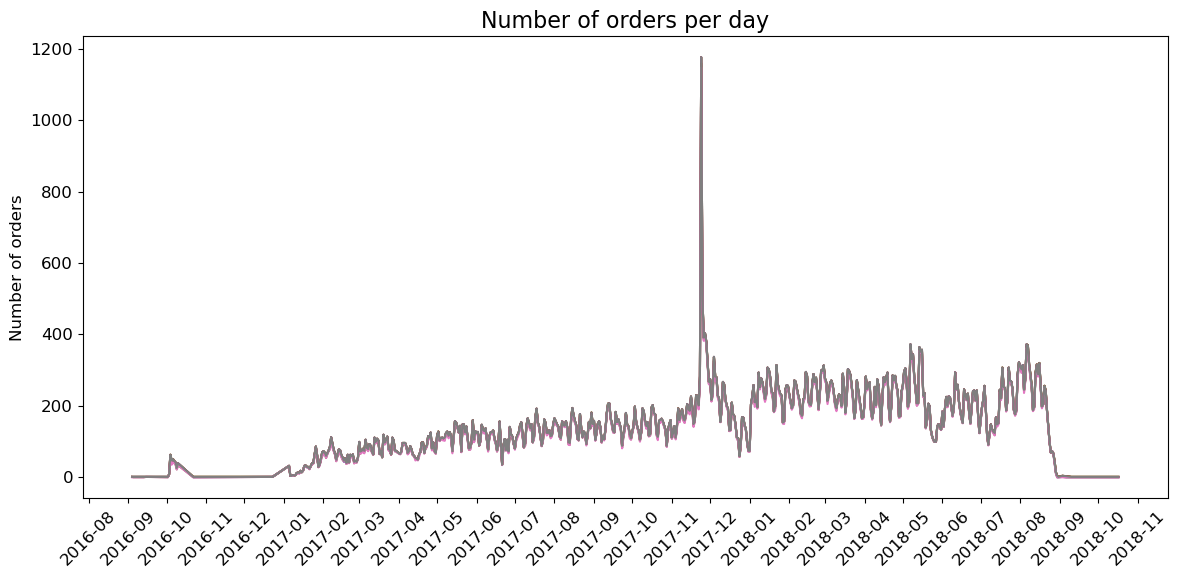

In [45]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Increase the default font size globally
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 16

# Line plot
plt.figure(figsize=(14, 6))
plt.plot(order_df['order_purchase_timestamp'].dt.date.sort_values().unique(), count_by_date)
plt.ylabel('Number of orders')
plt.title('Number of orders per day')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)
plt.show()

In [46]:
from datetime import date
import calendar

In [47]:
order_df['day_of_week'] = order_df['order_purchase_timestamp'].dt.day_name()

In [48]:
order_df['hour_of_day'] = order_df['order_purchase_timestamp'].dt.hour

In [49]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  object        
 8   day_of_week                    99441 non-null  object        
 9   hour_of_day                    99441 non-null  int32         
dtypes: datetime64[ns](1), int32(1), object(8)
memory usage: 7.2+ MB


In [50]:
order_df['hour_of_day'].unique()

array([10, 20,  8, 19, 21, 12, 13, 18, 11, 17, 14, 23,  0, 15,  7,  1, 16,
       22,  9,  3,  6,  4,  5,  2])

In [51]:
desired_columns = ['day_of_week', 'hour_of_day']
filtered_data = order_df[desired_columns]

filtered_data.pivot_table(index='day_of_week',value=''columns=['hour_of_day'],aggfunc='count')


SyntaxError: invalid syntax. Perhaps you forgot a comma? (1608257335.py, line 4)

In [54]:
cor_hour = order_df.pivot_table(index='day_of_week',values=['customer_id'],columns=['hour_of_day'],aggfunc='count')

In [61]:
cor_hour

customer_id                                          ...        \
hour_of_day          0    1   2   3   4   5   6    7    8    9   ...    14   
day_of_week                                                      ...         
Friday              426  216  72  49  40  36  97  206  493  768  ...   961   
Monday              328  134  66  36  21  22  69  160  479  783  ...  1096   
Saturday            315  175  67  43  25  24  53  106  249  434  ...   677   
Sunday              267  141  69  44  27  27  34  105  205  349  ...   684   
Thursday            355  167  75  39  31  28  85  220  502  758  ...   977   
Tuesday             306  158  80  28  29  24  71  223  522  864  ...  1124   
Wednesday           397  179  81  33  33  27  93  211  517  829  ...  1050   

                                                              
hour_of_day    15    16   17   18   19    20    21   22   23  
day_of_week                                                   
Friday        979   974  817  723  784   738   726  702  512  
Monday       1079  1094  992  928  945  1027  1118  991  717  
Saturday      722   697  701  710  756   730   654  550  429  
Sunday        716   712  797  895  899   967   889  873  607  
Thursday      928  1077  909  784  826   839   840  857  551  
Tuesday      1047  1081  967  877  924   988  1027  965  692  
Wednesday     983  1040  967  852  848   904   963  878  615  

[7 rows x 24 columns]

In [62]:
len(cor_hour)

7

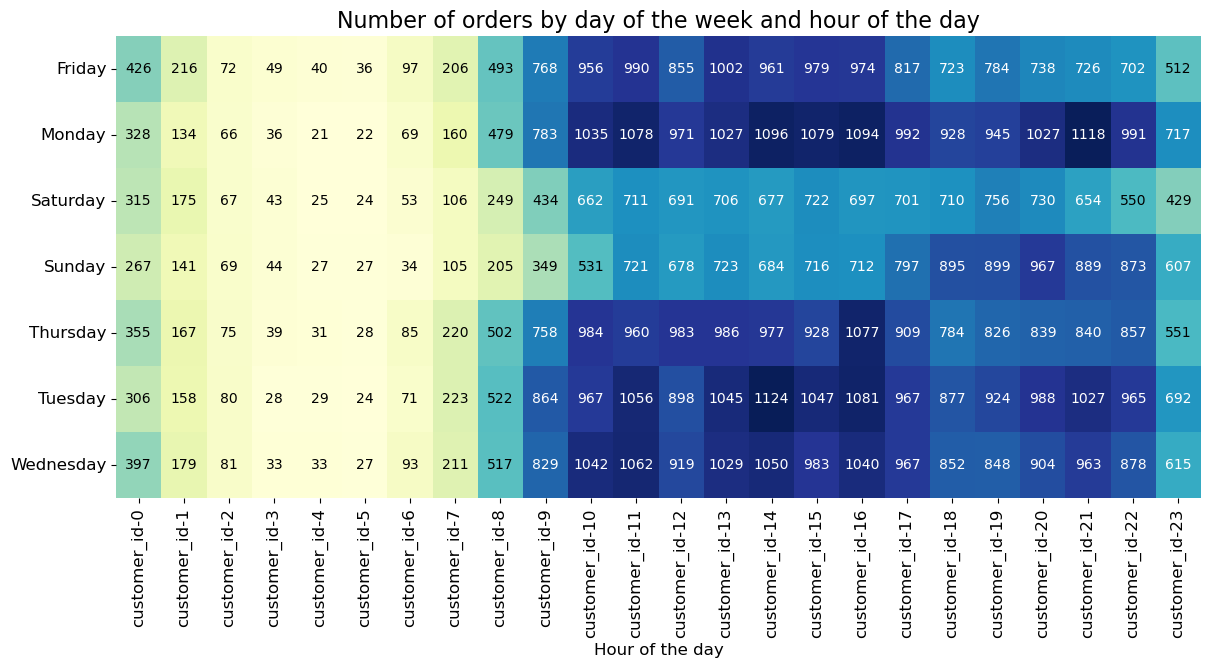

In [65]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(14, 6))
sns.heatmap(cor_hour, cmap='YlGnBu', cbar=False)
mean_orders = cor_hour.mean().mean()
for i in range(len(cor_hour)):
    for j in range(len(cor_hour.columns)):
        text_color = 'white' if cor_hour.iloc[i, j] > mean_orders else 'black'
        ax.text(j+0.5, i+0.5, int(cor_hour.iloc[i, j]),
            color=text_color, fontsize=10, ha="center", va="center")
plt.title("Number of orders by day of the week and hour of the day")
plt.xlabel("Hour of the day")
plt.ylabel("")
plt.show()

In [75]:
data_by_file

{'olist_customers_dataset':                             customer_id                customer_unique_id  \
 0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
 1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
 2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
 3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
 4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
 ...                                 ...                               ...   
 99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
 99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
 99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
 99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
 99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   
 
        customer_zip_code_prefix   

In [76]:
merged_df = pd.merge(data_by_file['olist_customers_dataset'], order_df, on='customer_id')

In [77]:
merged_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,day_of_week,hour_of_day
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,Tuesday,15
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,Friday,20
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,Saturday,16
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,Tuesday,16
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,Sunday,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,Saturday,15
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,Wednesday,8
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00,Sunday,20
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00,Friday,21


In [81]:
len(merged_df['customer_city'].unique())

4119

In [91]:
top_cities = merged_df.groupby(['customer_city']).count().sort_values(by=['customer_id'],ascending=False).head(10)

In [92]:
top_cities

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,day_of_week,hour_of_day
customer_city,,,,,,,,,,,,,
sao paulo,15540,15540,15540,15540,15540,15540,15540,15511,15199,15046,15540,15540,15540
rio de janeiro,6882,6882,6882,6882,6882,6882,6882,6870,6781,6604,6882,6882,6882
belo horizonte,2773,2773,2773,2773,2773,2773,2773,2768,2724,2697,2773,2773,2773
brasilia,2131,2131,2131,2131,2131,2131,2131,2128,2101,2071,2131,2131,2131
curitiba,1521,1521,1521,1521,1521,1521,1521,1519,1494,1489,1521,1521,1521
campinas,1444,1444,1444,1444,1444,1444,1444,1440,1419,1406,1444,1444,1444
porto alegre,1379,1379,1379,1379,1379,1379,1379,1377,1358,1341,1379,1379,1379
salvador,1245,1245,1245,1245,1245,1245,1245,1245,1227,1188,1245,1245,1245
guarulhos,1189,1189,1189,1189,1189,1189,1189,1187,1155,1143,1189,1189,1189


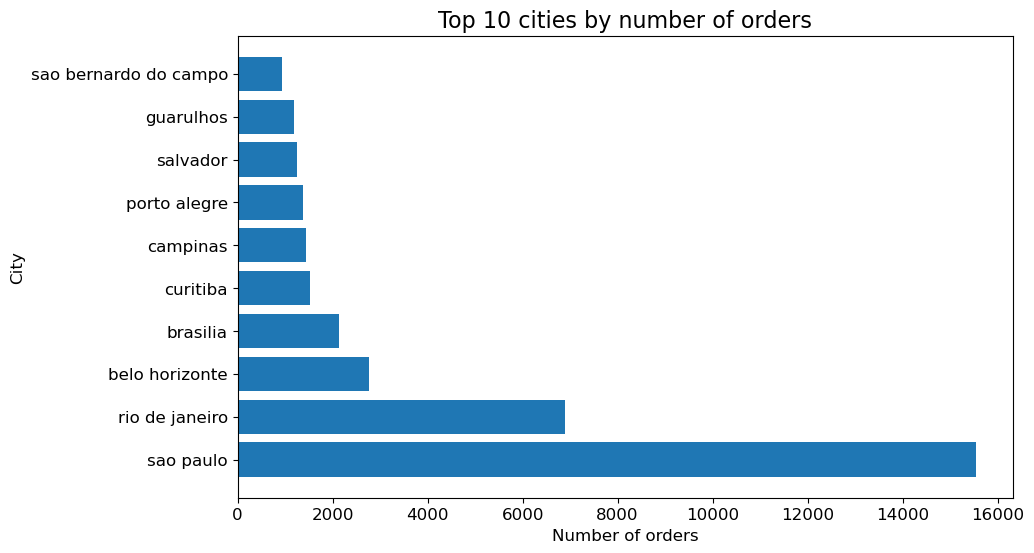

In [97]:
plt.figure(figsize=(10, 6))
plt.barh(top_cities.index, top_cities['customer_id'])
plt.xlabel('Number of orders')
plt.ylabel('City')
plt.title('Top 10 cities by number of orders')
plt.show()

In [114]:
data_by_file['olist_order_items_dataset']


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_price
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04
...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,343.40
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,386.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,116.85
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,64.71


In [120]:
data_by_file['olist_order_items_dataset'].groupby(by=['order_id']).sum().max()

order_item_id                                             231
product_id                   fffe9eeff12fcbd74a2f2b007dde0c58
seller_id                    ffff564a4f9085cd26170f4732393726
shipping_limit_date    2020-04-09 22:35:082020-04-09 22:35:08
price                                                 13440.0
freight_value                                         1794.96
order_price                                          13664.08
dtype: object

In [110]:
data_by_file['olist_order_items_dataset']['order_price'] = data_by_file['olist_order_items_dataset']['price']+ data_by_file['olist_order_items_dataset']['freight_value'] 